In [1]:
# some plot settings
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.family'] = "CMU Serif"
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams['figure.dpi'] = 120 
plt.rc('text', usetex=True) 

In [2]:
# we will use the tqdm progress bar
from tqdm.auto import tqdm,trange

## 10. The Umbrella Quandry

Imagine a man who walks every day between his home and his ofﬁce. Because of the ever-present threat of rain, he likes to keep an umbrella at each location; that way, so goes his reasoning, if it is raining when he is about to leave one location to walk to the other, he won’t get wet. The only ﬂaw in his grand plan is that if it isn’t raining he invariably neglects to take an umbrella with him. If you think about this for about ﬁve seconds, you should see that this can easily result in one location eventually having both umbrellas and the other location having none. If he then happens to be about to leave the no-umbrella location when it is raining, well, he’s going to get wet!

We are thus led to the following pretty problem. If it is raining with probability p at the time the man is about to start each of his walks, then, on average, how many times will he remain dry before experiencing his ﬁrst soaking? To make the problem just a bit more general, suppose we start the man off at home with x > 0 umbrellas, and with y > 0 umbrellas at the ofﬁce, where x and y are input parameters to a Monte Carlo simulation. Use your simulation to answer the above question for the two cases of x = y = 1 and x = y = 2, as p varies from 0.01 to 0.99. That covers the entire spectrum from a very dry place (it rains, on average, once every 100 walks) to a very wet place (it doesn’t rain, on average, once every 100 walks). Do you see why we don’t need to run a simulation for either of the two extreme values of p = 0 (it never rains) and of p = 1 (it always rains)? That is, are the answers for these two special cases obvious to you by inspection?

In [4]:
import numpy as np

# a function to find how many times the man will 
# remain dry before experiencing his first soaking
def dryTimes(x, y, p) :
    sims = 10**4
    dryWalks = 0
    # dictionary to toggle the location
    toggle = {"home": "office", "office": "home"}
    for i in range(sims) :
        # dictionary to keep a record of umbrellas at each location
        umbrellaLog = {"home": x, "office": y}
        # the man starts at home
        location = "home"
        while True :
            # is it raining?
            if np.random.rand() < p : # yes
                # are there umbrellas at the current location?
                if umbrellaLog[location] == 0 : # no
                    break # get drenched!
                else :
                    # umbrellas at current location reduces by 1
                    umbrellaLog[location] -= 1  
                    # umbrellas at the other location increases by 1
                    umbrellaLog[toggle[location]] += 1
            # our man has now travelled to the other location
            location = toggle[location]
            # ... and had a dry walk
            dryWalks += 1
    return dryWalks/sims

Using the function above to find the average number of dry walks (a) when there is 1 umbrella each at home/office initally and (b) when there is 2 umbrellas each at home/office initially.

In [5]:
pDat = np.arange(0.01,0.999,0.01)
dryDat11 = [dryTimes(1,1,p) for p in tqdm(pDat)]
dryDat22 = [dryTimes(2,2,p) for p in tqdm(pDat)]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

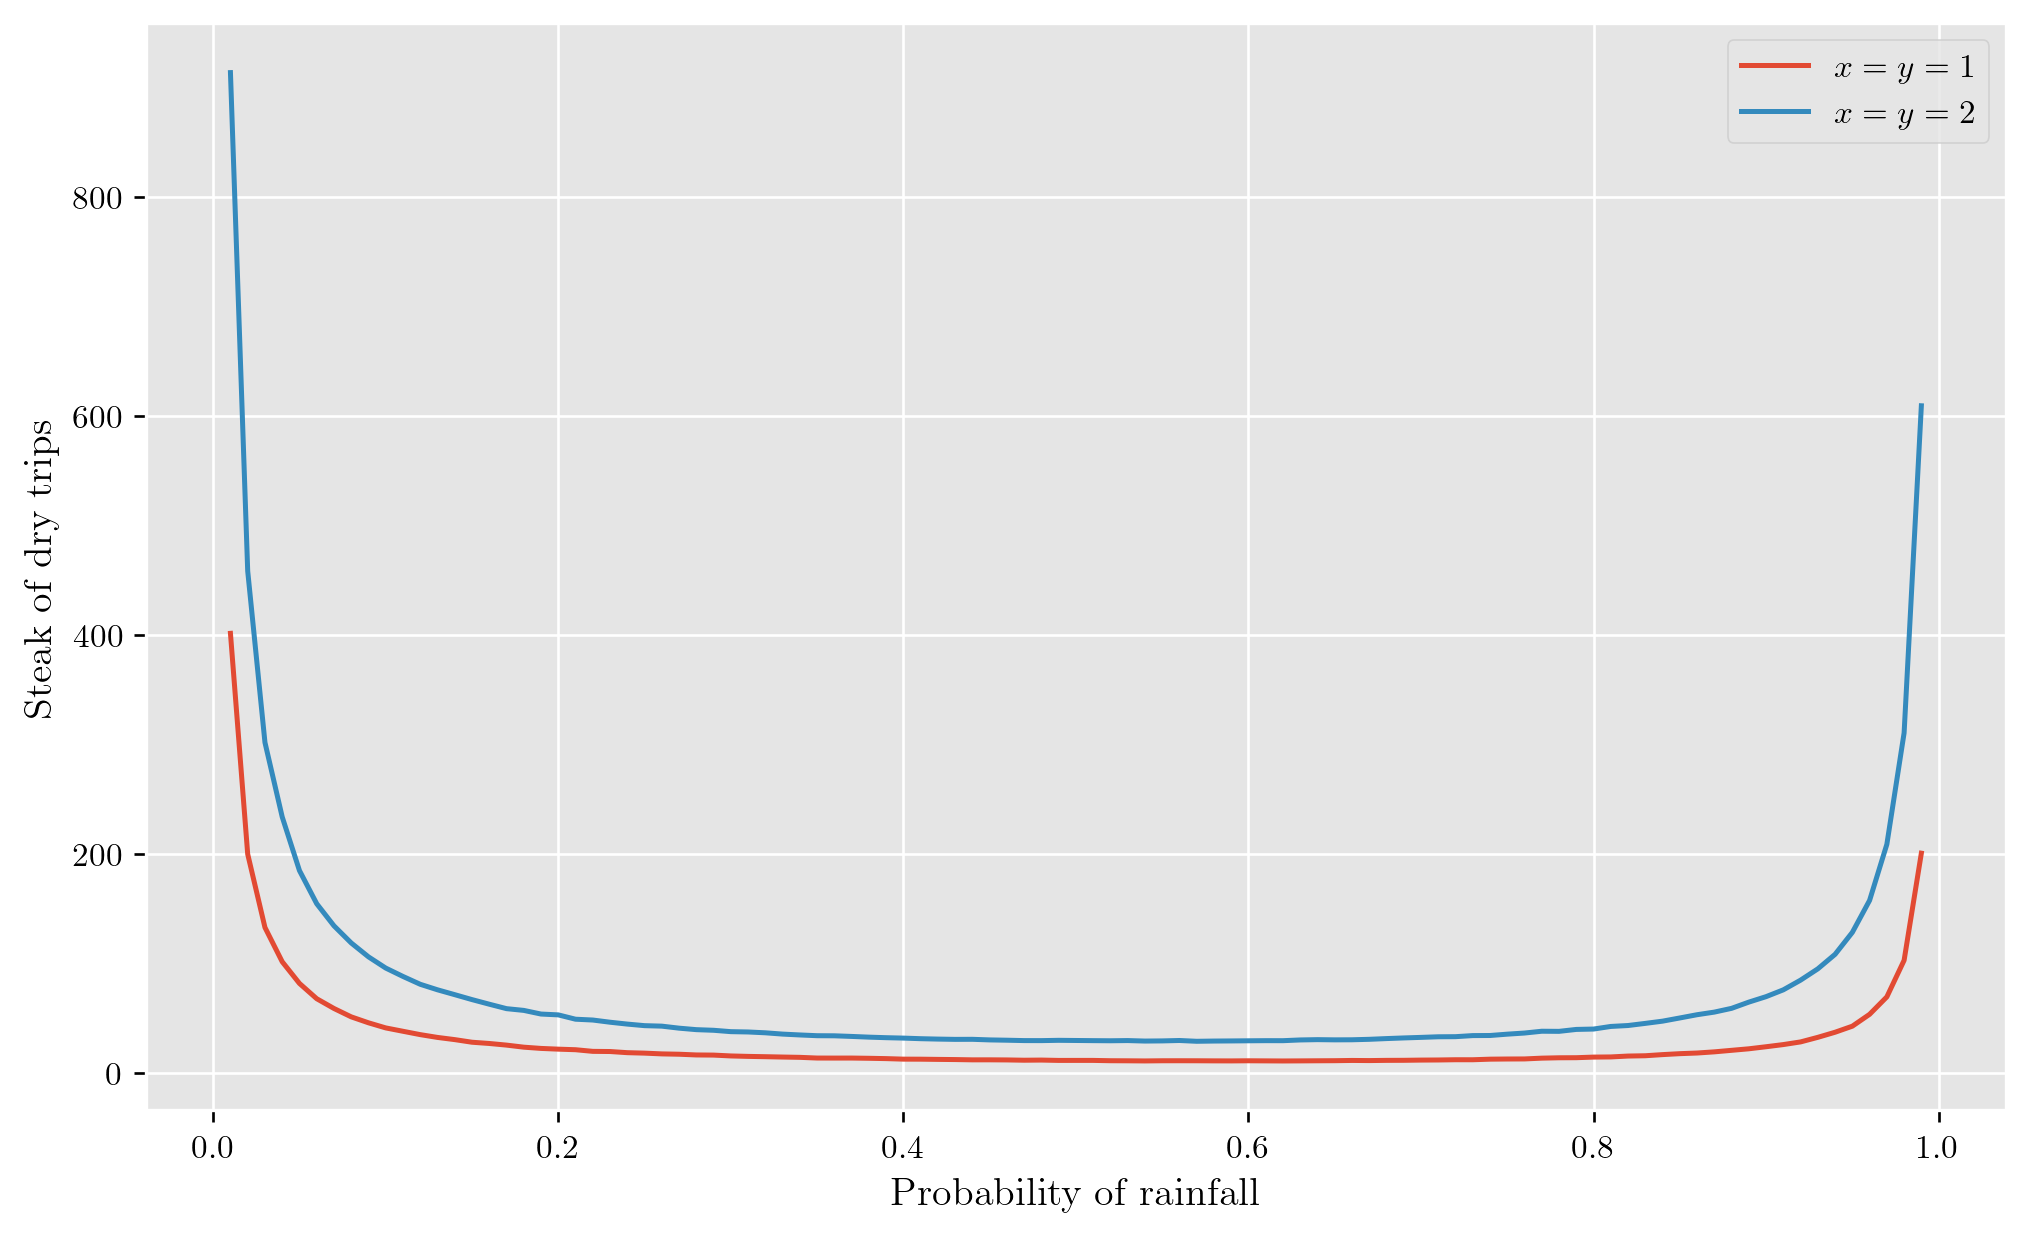

In [6]:
# plotting the results

plt.plot(pDat, dryDat11)
plt.plot(pDat, dryDat22)

plt.legend(["$x=y=1$","$x=y=2$"])
plt.ylabel('Steak of dry trips')
plt.xlabel('Probability of rainfall')

plt.show()

For $p=0$ it never rains and, therefore, the man has an infinite number of dry trips. For $p=1$ it's always raining, the man always carries an umbrella and the number of umbrellas remain conserved and is $>0$ at both locations. Hence, there are an infinite number of dry trips for $p=1$ as well. 